### Sinusoids encoding for position

This notebook explores the intuition and ideas for sinusoidal encoding for position information in a transformer.





What are the qualities a positional encoding need to have?

- It should output a unique encoding for each word’s position in a sentence.
- Distance between any two time-steps should be consistent across sentences with different lengths.
- Our model should generalize to longer sentences without any efforts. Its values should be bounded.
- It must be deterministic.



#### 01 - Learning positions during the backprop

This fails to generalize to longer sequences since we dont even have a learned representation for any seqeuence longer than what was used during training.

#### 02 - discrete values

assign 1, 2, 3, 4 etc? The problem is these positional embeddings might get too large as the sequence goes on and overshows the semantic meaning.

#### 03 - sinusoidal curves

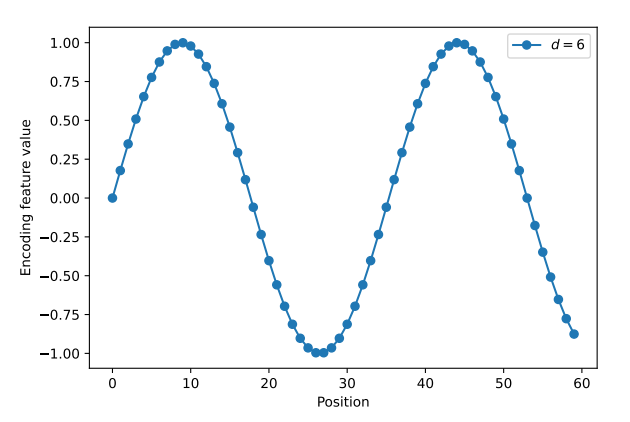

Sin curve is bounded between -1 and 1.

- say we have 60 positions, we use a sin curve to represent each positions. You can see that after the 25ish positions, the values start to repeat.

How about adding another curve in the mix? Add a cosine curve.

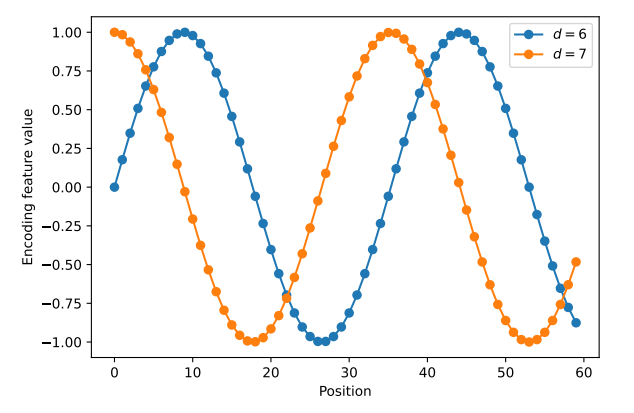

Now you are able to represent more values using both these curves.


Even though the encoding provides unique positional information over a longer range, the model may not necessarily rely on this absolute position information for its decision-making. 
Instead, it could focus on the relative position — how elements are positioned relative to each other, rather than their specific or absolute position values.


Using sinusoids at single frequency means there is lesser types of relative relationships you can model. So lets throws in multiple curves in t different frequencies.

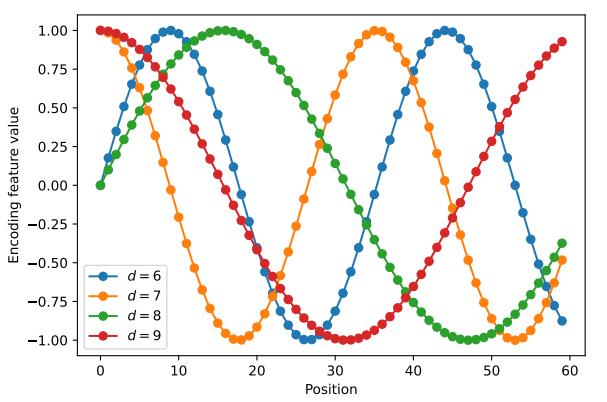

Formally the equation is -

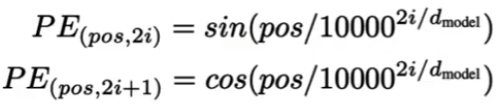

- i - index dimension
- dmodel - embed size
- pos - position of word 

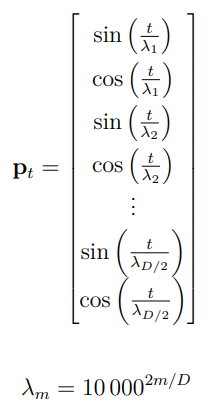

In [ ]:
import torch
import torch.nn as nn

class PositionalEncoding(nn.Module):

    def __init__(self, d_model, sequence_length):
        super().__init__()
        self.sequence_length = sequence_length
        self.d_model = d_model

    def forward(self):
        even_i = torch.arange(0, self.d_model, 2).float()
        denominator = torch.pow(10000, even_i/self.d_model)
        position = torch.arange(self.sequence_length).reshape(self.sequence_length, 1)
        even_PE = torch.sin(position / denominator)
        odd_PE = torch.cos(position / denominator)
        stacked = torch.stack([even_PE, odd_PE], dim=2)
        PE = torch.flatten(stacked, start_dim=1, end_dim=2) # interwe4ave in between odd even odd even
        return PE
     

pe = PositionalEncoding(d_model = 512, sequence_length = 1000)
encodings = pe.forward()

In [19]:
encodings.shape

torch.Size([1000, 512])

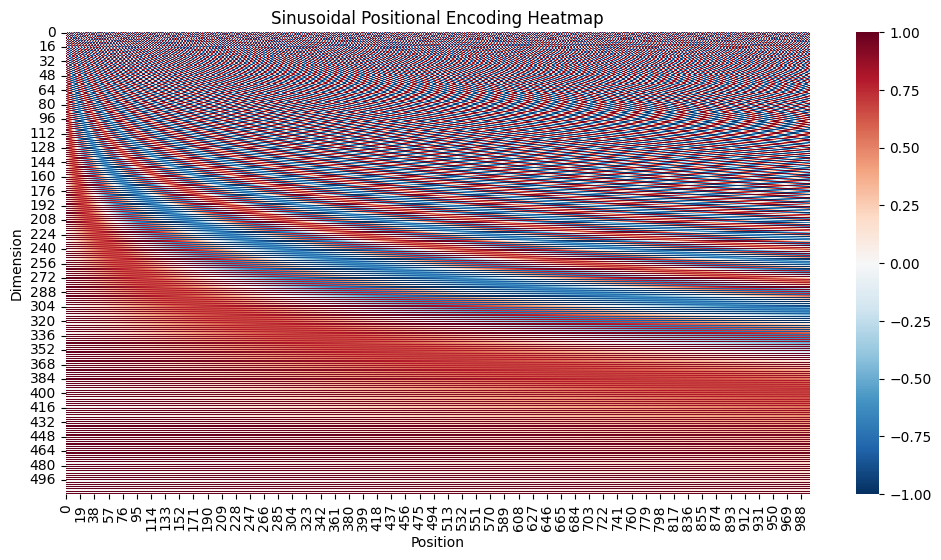

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
encoding = encodings.T.detach().numpy()
sns.heatmap(encoding, cmap='RdBu_r', vmin=-1, vmax=1)
plt.xlabel('Position')
plt.ylabel('Dimension')
plt.title('Sinusoidal Positional Encoding Heatmap')
plt.show()